In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import numpy as np

In [4]:
crea=pd.read_csv('crea.csv')
crea.set_index('id', drop=True, inplace=True)

In [249]:
def dropnan(x):
    return x[np.isfinite(x)]

def get_xy(x):
    y=dropnan(x)
    x=np.arange(len(y))
    return x,y

def get_trend(y,return_scalar=True):
    x=np.arange(len(y))
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    if return_scalar:
        return p[1]
    else:
        return p


def overlaps(windows):
    r=[(i-20,i) for i in windows]
    b = []
    for begin,end in sorted(r):
        if b and b[-1][1] >= begin - 1:
            b[-1][1] = max(b[-1][1], end)
        else:
            b.append([begin, end])
    return b

def len_and_change(ranges,y):

    lenghts=[]
    changes=[]

    for r in ranges:
        start_i=r[0]
        end_i=r[1]
        start=y[start_i]
        end=y[end_i]
        leni=end_i-start_i
        change=end-start
        lenghts.append(leni)
        changes.append(change)
    
    return lenghts,changes

In [228]:
i=crea.index[0]
pat=crea.loc['zcrlcyn']

In [259]:


def change_pat(pat,window_size,thresh_dir,thresh,plot):

    x,y=get_xy(pat.values)
    if plot:
        p=get_trend(y,return_scalar=False)
        plt.plot(x,p(x), 'g--')

    if plot:
        plt.plot(x,y)

    window_trends=pd.Series(y).rolling(window_size).apply(lambda x:get_trend(x))

    windows=[]
    mid_range=np.mean([y.max(), y.min()])/1.5
    shift=(y.max()-y.min())/400

    for i,win in enumerate(window_trends):
        if thresh_dir=='larger':
            if win>thresh:
                windows.append(i)
                if plot:
                    plt.axhline(y=mid_range+(i*shift), xmin=((i-20)/len(window_trends)), xmax=i/len(window_trends),color='r')
        else:
             if win<thresh:
                windows.append(i)
                if plot:
                    plt.axhline(y=mid_range+(i*shift), xmin=((i-20)/len(window_trends)), xmax=i/len(window_trends),color='r')

    if len(windows)==0:
        change_bool=0
        mean_change=0
        total_lenght=0
        return change_bool,mean_change,total_lenght
    else:
        change_bool=1

        ranges=overlaps(windows)   
        lenghts,changes=len_and_change(ranges,y)      
        
        mean_change=np.average(changes, weights=lenghts)
        total_lenght=sum(lenghts)
        return change_bool,mean_change,total_lenght

(1, 0.01687172825026335, 106)

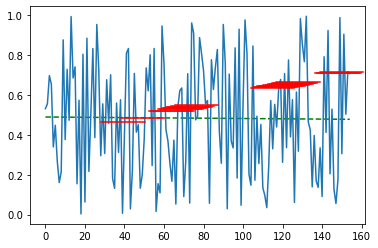

In [270]:
results=pd.DataFrame()
for pat in crea.index:
    pati=crea.loc[pat]    
    change_bool,mean_change,total_lenght=change_pat(pati, window_size=20,thresh_dir='larger',thresh=0.01,plot=False)
    results=results.append({'id':pat,'change_bool':change_bool,'mean_change':mean_change,'total_lenght':total_lenght},ignore_index=True)

(1, 0.3591727353989691, 134)

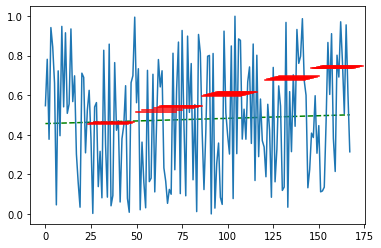

In [273]:
pat=crea.loc['hngsabv']
change_pat(pat, window_size=20,thresh_dir='larger',thresh=0.01,plot=True)